In [1]:
import matplotlib.pyplot as plt

In [1]:
from plastid import GTF2_Reader, BAMGenomeArray, FivePrimeMapFactory, BED_Reader, Transcript, BigWigGenomeArray, BigWigReader, GenomicSegment

In [3]:
import numpy as np

In [ ]:
transcripts = list(GTF2_Reader("dmel-mrna-r6.18.gtf",return_type=Transcript))

In [5]:
#returns index of transcript of given name (i.e. FBtr1239821) from transcripts array
def find_index(name):
    x=0
    for transcript in transcripts:
        if transcripts[x].get_name()==name:
            return x
        x += 1

In [6]:
#returns counts in count_vector array along protein coding segments of transcripts for given data array (count_data)
def get_counts(count_vector, count_data):
    i=0
    for transcript in transcripts:
        if transcript.get_cds().segments != []:
            count_vector.append([])
            for segment in transcript.get_cds().segments:
                count_vector[i]=np.insert(count_vector[i],len(count_vector[i]),count_data[segment])
            i+=1
        else:
            count_vector.append([])
            i+=1

In [7]:
#returns counts in count_vector array along protein coding segments of transcripts for given data array (count_data)
def get_utr5_counts(count_vector, count_data):
    i=0
    for transcript in transcripts:
        if transcript.get_utr5().segments != []:
            count_vector.append([])
            for segment in transcript.get_utr5().segments:
                count_vector[i]=np.insert(count_vector[i],len(count_vector[i]),count_data[segment])
            i+=1
        else:
            count_vector.append([])
            i+=1

In [8]:
#returns counts in count_vector array along protein coding segments of transcripts for given data array (count_data)
def get_utr3_counts(count_vector, count_data):
    i=0
    for transcript in transcripts:
        if transcript.get_utr3().segments != []:
            count_vector.append([])
            for segment in transcript.get_utr3().segments:
                count_vector[i]=np.insert(count_vector[i],len(count_vector[i]),count_data[segment])
            i+=1
        else:
            count_vector.append([])
            i+=1

In [9]:
#sums the counts for a gene across all its transcripts (giving FPM values)
def gene_counts_no_norm(gene_counts_vector,counts_data):

    i=0
    for index in counts_data:
        if gene_IDs[i] not in genes:
            genes.append(gene_IDs[i])
            gene_counts_vector.append(np.sum(counts_data[i]))
        else:
            r = genes.index(gene_IDs[i])
            gene_counts_vector[r] = gene_counts_vector[r] + np.sum(counts_data[i])
        i += 1
        

In [10]:
#sums the counts for a gene across all its transcripts and normalizes by 1000 / sum transcript length (giving FPKM values)
def gene_counts(gene_counts_vector,counts_data):

    i=0
    genes=[]
    for index in counts_data:
        if gene_IDs[i] not in genes:
            genes.append(gene_IDs[i])
            gene_counts_vector.append(np.sum(counts_data[i])*1000/len(counts_data[i]))
        else:
            r = genes.index(gene_IDs[i])
            gene_counts_vector[r] = gene_counts_vector[r] + np.sum(counts_data[i])*1000/len(counts_data[i])
        i += 1

In [11]:
#return total counts
def total(counts_data):
    x = 0
    for i in counts_data:
        x += np.sum(i)
    return x

In [12]:
#the 'transcript_genes.tsv' constains transcript ID's for all genes
transcript_ID_infile = open('riboprofiling/transcript_genes.tsv','r')

In [13]:
#copy transcript and gene IDs into 'transcript_IDs' and 'gene_IDs' arrays
transcript_IDs = []
gene_IDs = []
for line in transcript_ID_infile:
    l = line.split('\t')
    transcript_IDs.append(l[0])
    gene_IDs.append(l[1].split('-R')[0]) #remove transcript -RA -RB etc from transcript name
    

In [14]:
#copy gene IDs into nonredundant array 'genes'
genes=[]
i=0
for index in gene_IDs:
    if index not in genes:
        genes.append(index)
    i+=1
    

In [17]:
M_all = BAMGenomeArray("M_all.bam")

In [18]:
F_all = BAMGenomeArray("F_all.bam")

In [19]:
counts_M = []
counts_F = []

In [52]:
M_counts[4818]

array([ 0.06350806,  0.06350806,  0.06350806, ...,  0.03125   ,
        0.03125   ,  0.03125   ])

In [23]:
M_counts = []
F_counts = []

In [25]:
for transcript in transcripts:
    M_counts.append(transcript.get_counts(M_all))
    F_counts.append(transcript.get_counts(F_all))
    

In [31]:
M_sum = 0
F_sum = 0
for counts in M_counts:
    M_sum+=counts.sum()
for counts in F_counts:
    F_sum+=counts.sum()

In [32]:
M_sum

2475583.7180980104

In [33]:
F_sum

4301261.3360799327

In [34]:
find_index('FBtr0079545') #poe

2818

In [41]:
M_counts_norm = []
for counts in M_counts:
    M_counts_norm.append(counts*4301261.3360799327 / 2475583.7180980104)

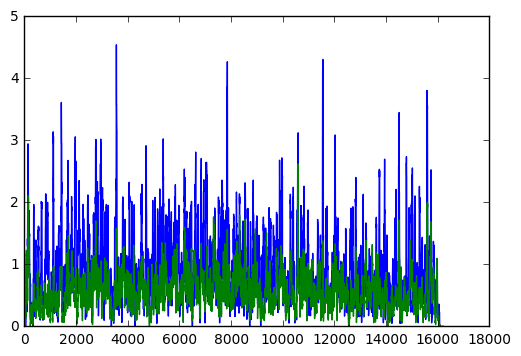

In [42]:
plt.plot(M_counts_norm[2818])
plt.plot(F_counts[2818])
plt.show()

In [39]:
find_index('FBtr0079975') #me31b

3255

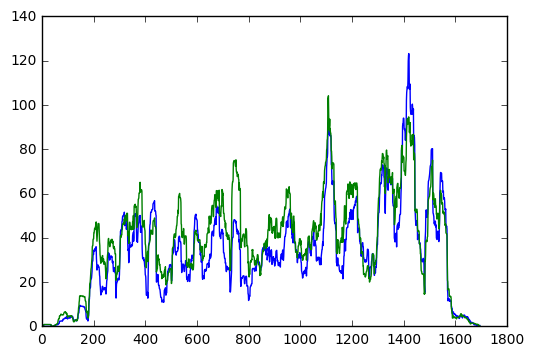

In [43]:
plt.plot(M_counts_norm[3255])
plt.plot(F_counts[3255])
plt.show()

In [51]:
x = find_index('FBtr0074082')
x

In [48]:
find_index('FBtr0084952')

In [151]:
print total(utr5_counts_eA), total(utr5_counts_1A), total(utr5_counts_1B), total(utr5_counts_4B), total(utr5_counts_7B), total(utr5_counts_10A), total(utr5_counts_10B), total(utr5_counts_14B)

1062031.927 1083756.43845 597838.01999 817115.629252 655550.070425 640700.474877 447568.563182 501371.558245


In [154]:
print total(utr3_counts_eA), total(utr3_counts_1A), total(utr3_counts_1B), total(utr3_counts_4B), total(utr3_counts_7B), total(utr3_counts_10A), total(utr3_counts_10B), total(utr3_counts_14B)

951894.758085 267778.125635 174400.52625 249959.318766 258213.296593 234872.795444 177378.715344 206316.606869


In [104]:
gene_counts_7B = []

In [24]:
gene_counts(gene_counts_eA, counts_eA)
gene_counts(gene_counts_1A, counts_1A)
gene_counts(gene_counts_1B, counts_1B)
gene_counts(gene_counts_4B, counts_4B)
gene_counts(gene_counts_10A, counts_10A)
gene_counts(gene_counts_10B, counts_10B)
gene_counts(gene_counts_14B, counts_14B)

---------------------------------------------------------------------------
RuntimeWarning
invalid value encountered in double_scalars
in /Users/ethan/plastid/lib/python2.7/site-packages/ipykernel/__main__.py, line 9:



---------------------------------------------------------------------------
---------------------------------------------------------------------------
RuntimeWarning
invalid value encountered in double_scalars
in /Users/ethan/plastid/lib/python2.7/site-packages/ipykernel/__main__.py, line 12:



---------------------------------------------------------------------------


In [105]:
gene_counts(gene_counts_7B, counts_7B)

---------------------------------------------------------------------------
RuntimeWarning
invalid value encountered in double_scalars
in /Users/ethan/plastid/lib/python2.7/site-packages/ipykernel/__main__.py, line 9:



---------------------------------------------------------------------------
---------------------------------------------------------------------------
RuntimeWarning
invalid value encountered in double_scalars
in /Users/ethan/plastid/lib/python2.7/site-packages/ipykernel/__main__.py, line 12:



---------------------------------------------------------------------------


In [25]:
#output data into a comma-delimited file
outfile = open('normfpkmdata.csv','w')
i=0
outfile.write('eA , 1A , 1B , 4B , 10A , 10B , 14B\n')
for index in genes:
    outfile.write(genes[i] + ' , ' + str(gene_counts_eA[i]) + ' , ' + str(gene_counts_1A[i]) + ' , ' + str(gene_counts_1B[i]) + ' , ' + str(gene_counts_4B[i]) + ' , ' + str(gene_counts_10A[i]) + ' , ' + str(gene_counts_10B[i]) + ' , ' + str(gene_counts_14B[i]) + '\n')
    i+=1
outfile.close()

In [114]:
#output data into a comma-delimited file
outfile = open('normfpkmdata7B.csv','w')
i=0
outfile.write('7B\n')
for index in genes:
    outfile.write(genes[i] + ' , ' + str(gene_counts_7B[i]) + '\n')
    i+=1
outfile.close()

In [26]:
find_index('FBtr0076754')

15708

In [27]:
plt.plot(counts_eA[15708])

NameError: name 'eA_counts' is not defined

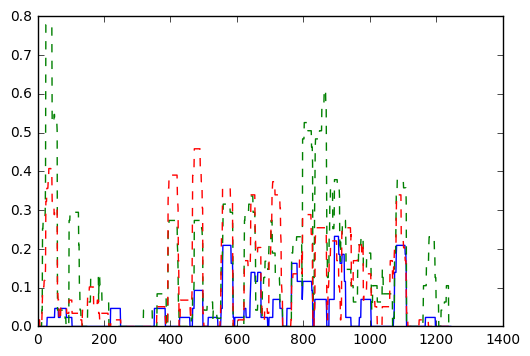

In [100]:
#plotting increase in Nemo translation
plt.plot(range(len(counts_1A[15708])),counts_1A[15708],'-')
plt.plot(range(len(counts_10B[15708])),counts_10B[15708],'--')
plt.plot(range(len(counts_14B[15708])),counts_14B[15708],'--')
plt.show()

In [115]:
dir(transcripts[0])

['__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_get_8_gff_columns',
 'add_masks',
 'add_segments',
 'antisense_overlaps',
 'as_bed',
 'as_gff3',
 'as_gtf',
 'as_psl',
 'attr',
 'c_strand',
 'cds_end',
 'cds_genome_end',
 'cds_genome_start',
 'cds_start',
 'chrom',
 'covers',
 'from_bed',
 'from_psl',
 'from_str',
 'get_antisense',
 'get_cds',
 'get_counts',
 'get_fasta',
 'get_gene',
 'get_genomic_coordinate',
 'get_junctions',
 'get_length',
 'get_masked_counts',
 'get_masked_length',
 'get_masked_position_set',
 'get_masks',
 'get_masks_as_segmentchain',
 'get_name',
 'get_position_list',
 

In [ ]:
np.sum(counts)